**Q1. Problem Statement: Confusion Matrix**

Load the 'Breast_Cancer_Dataset.csv' dataset into a DataFrame and perform the following tasks:
1.	Identify the null values and remove the null rows and columns by using the dropna() function
2.	Encode the 'diagnosis' column using the LabelEncoder()
3.	Considering the 'diagnosis' column as the target, separate the target variable and the feature vectors
4.	Split the dataset into the training set and test set in a 70:30 ratio
5.	 Building a Logistic Regression, Naive Bayes, Decision Tree (CART), K-NN, SVM, and RandomForestClassifier models; Also print their accuracies
6.	Calculate and plot the confusion matrix

**Step-1:** importing the required libraries.

In [1]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 

**Step-2:** Loading the CSV data into a DataFrame. 

In [2]:
data=pd.read_csv("/content/Breast_Cancer_Dataset.csv")
df = data.copy()
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Step-3:** Identifying and dropping the null rows/columns.

In [3]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
df = df.iloc[: , :-1]

**Step-4:** Encoding the 'diagnosis' column using the LabelEncoder()

In [ ]:
le = preprocessing.LabelEncoder()
df.diagnosis = le.fit_transform(df['diagnosis'])
df.head()

**Step-5:** Separating the target variable and the feature vectors.

In [5]:
X = df.drop(["diagnosis"], axis=1) # Features
y = df["diagnosis"] # Target variable
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

**Step-6:**  Splitting the dataset into training set and test set.

In [11]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

**Step-7:** Building a Logistic Regression, Naive Bayes, Decision Tree (CART), K-NN, SVM, and RandomForestClassifier models. Also,print their respective accuracies.

**Hint:** You can declare the algorithms in a list and iterate through them to build their respective models and calcult thier accuracies using a for loop.

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier


models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree (CART)',DecisionTreeClassifier())) 
models.append(('K-NN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('RandomForestClassifier', RandomForestClassifier()))


for name, model in models:
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    from sklearn import metrics

    print("%s -> ACC: %%%.2f" % (name,metrics.accuracy_score(y_test, y_pred)*100))

Logistic Regression -> ACC: %63.16
Naive Bayes -> ACC: %63.16
Decision Tree (CART) -> ACC: %92.40
K-NN -> ACC: %76.61
SVM -> ACC: %63.16
RandomForestClassifier -> ACC: %95.32


**Step-8:** Calculating and plotting the confusion matrix.

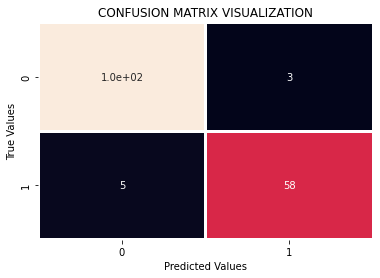

In [14]:
from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test, y_pred,labels=[1,0]))
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX VISUALIZATION")
plt.show()

**Result:** From the confusion matrix we can conclude that, there are:
1. 104 true positive diagnosis
2. 4 false positive diagnosis
3. 6 false negetive diagnosis
4. 57 true negetive diagnosis

Hence the accuracy shown by the models is very close to the results shown by the confusion matrix.

**Q2. Problem Statement: ROC, AUC, Precision, Recall, and F1 Score**

Load the 'Breast_Cancer_Dataset.csv' dataset into a DataFrame and perform the following tasks:
1.	Identify the null values and remove the null rows and columns by using the dropna() function
2.	Considering the 'diagnosis' column as the target, encode the 'diagnosis' column using the LabelEncoder()
3.	Separate the target variable and the feature vectors
4.	Split the dataset into the training set and test set in a 70:30 ratio
5.	 Building a Logistic Regression, Naive Bayes, Decision Tree (CART), K-NN, SVM, and RandomForestClassifier models; Also, print their accuracies
6.	Calculate the  ROC_AUC score based on the False Positive Rate (FPR) and True Positive Rate (TPR)
7.	Plot the ROC Curve using the Matplotlib library
8.	Calculate the F1 Score
9.	Calculate and Print the Precision, Recall, and F1 score using the classification_report() function

**Step-1:** importing the required libraries.

In [15]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 

**Step-2:** Loading the CSV data into a DataFrame. 

In [16]:
data=pd.read_csv("/content/Breast_Cancer_Dataset.csv")
df = data.copy()
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Step-3:** Identifying and dropping the null rows/columns.

In [17]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [18]:
df = df.iloc[: , :-1]

**Step-4:** Encoding the 'diagnosis' column using the LabelEncoder()

In [19]:
le = preprocessing.LabelEncoder()
df.diagnosis = le.fit_transform(df['diagnosis'])

**Step-5:** Separating the target variable and the feature vectors.

In [20]:
X = df.drop(["diagnosis"], axis=1) # Features
y = df["diagnosis"] # Target variable

**Step-6:**  Splitting the dataset into training set and test set.

In [21]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

**Step-7:** Building a Logistic Regression, Naive Bayes, Decision Tree (CART), K-NN, SVM, and RandomForestClassifier models. Also,print thier respective accuracies.

**Hint:** You can declare the algorithms in a list and iterate through them to build thier respective models and calcult thier accuracies using a for loop.

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier


models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree (CART)',DecisionTreeClassifier())) 
models.append(('K-NN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('RandomForestClassifier', RandomForestClassifier()))


for name, model in models:
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    from sklearn import metrics

    print("%s -> ACC: %%%.2f" % (name,metrics.accuracy_score(y_test, y_pred)*100))

Logistic Regression -> ACC: %63.16
Naive Bayes -> ACC: %63.16
Decision Tree (CART) -> ACC: %93.57
K-NN -> ACC: %76.61
SVM -> ACC: %63.16
RandomForestClassifier -> ACC: %95.32


**Step-8:** Calculating the  ROC AUC score based on False Positive Rate (FPR) and True Positive Rate (TPR).

In [23]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("roc_auc score is:")
roc_auc

roc_auc score is:


0.9464285714285714

**Step-9:** Plotting the ROC Curve using the Matplotlib library.

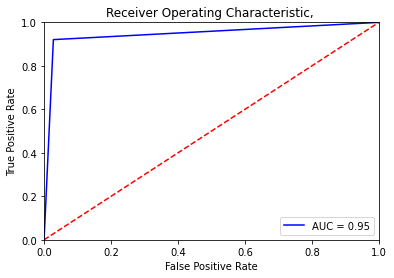

In [24]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic, ')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Step-10:** Calculating the F1 Score.

In [25]:
from sklearn.metrics import f1_score
print("F1 score is:")
f1_score(y_test,y_pred)

F1 score is:


0.9354838709677418

**Step-11:** Calculating and Printing the Precision, Recall, and F1 Score using the classification_report() function.

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.92      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



**Q3. Problem Statement: Grid Search**

Load the ‘voice.csv’ dataset into a DataFrame and perform the following tasks:
1.	Considering the ‘label’ column as the target variable, rename the column as ‘Gender_Identified’
2.	Using the preprocessing() function, label the target column
3.	Separate the target variable and the feature vectors
4.	Build a RandomForestClassifier model and find the best parameters using a Grid search
5.	Print the best parameters and the best estimator


**Step-1:** Importing the required libraries.

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

**Step-2:** Loading the CSV data into a DataFrame.

In [28]:
data=pd.read_csv('/content/voice.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


**Step-3:** Considering the 'label' column as target variable , renaming the column as 'Gender_Identified'.

In [29]:
data.rename(columns = {'label':'Gender_Identified'}, inplace = True)
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,Gender_Identified
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


**Step-4:** Identifying the null values.

In [30]:
data.isnull().sum()

meanfreq             0
sd                   0
median               0
Q25                  0
Q75                  0
IQR                  0
skew                 0
kurt                 0
sp.ent               0
sfm                  0
mode                 0
centroid             0
meanfun              0
minfun               0
maxfun               0
meandom              0
mindom               0
maxdom               0
dfrange              0
modindx              0
Gender_Identified    0
dtype: int64

**Step-5:** Using the preprocessing() function labeling the target column.

In [31]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data.Gender_Identified = le.fit_transform(data['Gender_Identified'])

In [32]:
data.sample(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,Gender_Identified
307,0.199662,0.061042,0.202367,0.140745,0.260080,0.119335,2.952942,15.732907,0.892992,0.194141,...,0.199662,0.113574,0.034632,0.266667,0.253125,0.007812,0.539062,0.531250,0.304367,1
1430,0.186409,0.062359,0.186667,0.151610,0.240390,0.088780,1.341256,4.977692,0.926570,0.459924,...,0.186409,0.125811,0.048048,0.279070,1.100565,0.023438,5.882812,5.859375,0.159721,1
2847,0.231768,0.038282,0.236158,0.226211,0.247947,0.021737,3.730854,20.259840,0.790508,0.164982,...,0.231768,0.204786,0.047244,0.279070,0.992506,0.023438,9.890625,9.867188,0.105010,0
498,0.207534,0.051074,0.221954,0.154122,0.251533,0.097411,1.596567,6.751481,0.905324,0.188695,...,0.207534,0.131116,0.024353,0.275862,0.901042,0.156250,5.898438,5.742188,0.181803,1
399,0.181903,0.062600,0.173607,0.134089,0.244536,0.110446,1.338495,4.773083,0.935004,0.524517,...,0.181903,0.120294,0.041995,0.228571,0.558764,0.007812,4.328125,4.320312,0.092142,1
1037,0.198727,0.060825,0.210000,0.142930,0.253953,0.111023,1.461299,5.879052,0.926904,0.388860,...,0.198727,0.130017,0.047151,0.279070,1.206653,0.023438,11.390625,11.367188,0.073859,1
1297,0.186318,0.055211,0.205570,0.126709,0.222405,0.095696,2.116779,7.431564,0.887692,0.291939,...,0.186318,0.119743,0.047431,0.272727,0.781428,0.023438,5.085938,5.062500,0.125116,1
1576,0.157763,0.060960,0.133325,0.111132,0.220429,0.109297,3.410285,17.889424,0.911712,0.463351,...,0.157763,0.114819,0.052083,0.263158,0.575421,0.004883,3.955078,3.950195,0.195022,1
506,0.160375,0.076347,0.143243,0.118679,0.235702,0.117023,3.408650,26.938596,0.927764,0.537783,...,0.160375,0.122719,0.017699,0.275862,0.140430,0.007812,0.695312,0.687500,0.104798,1
2831,0.226397,0.035737,0.229934,0.222517,0.240689,0.018172,3.862402,19.680483,0.790700,0.188990,...,0.226397,0.196659,0.049080,0.266667,1.773290,0.023438,8.414062,8.390625,0.099162,0


**Step-6:** Separating the feature vectors and the target variable.

In [33]:
X=data.drop(['Gender_Identified'],axis=1)
y=data.Gender_Identified

In [34]:
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [35]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Gender_Identified, dtype: int64

**Step-7** Building a RandomForestClassifier model and finding the best parameters using Grid search.

In [36]:
params = { "criterion" : ["gini", "entropy"], "n_estimators": [100, 150, 200,300]}
rf_gsv=GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,cv=3,scoring='accuracy')
rf_gsv.fit(X,y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 150, 200, 300]},
             scoring='accuracy')

In [37]:
pd.DataFrame(rf_gsv.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
5,1.056300,0.075217,0.031886,0.000578,entropy,150,"{'criterion': 'entropy', 'n_estimators': 150}",0.946970,0.982955,0.969697,0.966540,0.014859,1
7,2.095489,0.129238,0.078398,0.022788,entropy,300,"{'criterion': 'entropy', 'n_estimators': 300}",0.946970,0.982008,0.969697,0.966225,0.014513,2
0,0.782895,0.049877,0.041504,0.016913,gini,100,"{'criterion': 'gini', 'n_estimators': 100}",0.942235,0.982008,0.971591,0.965278,0.016840,3
6,1.966664,0.321352,0.068278,0.019412,entropy,200,"{'criterion': 'entropy', 'n_estimators': 200}",0.940341,0.983902,0.969697,0.964646,0.018139,4
1,0.815387,0.027700,0.033440,0.001243,gini,150,"{'criterion': 'gini', 'n_estimators': 150}",0.939394,0.981061,0.972538,0.964331,0.017973,5
2,1.092255,0.034282,0.042903,0.000223,gini,200,"{'criterion': 'gini', 'n_estimators': 200}",0.939394,0.981061,0.972538,0.964331,0.017973,5
3,2.472308,0.341843,0.094763,0.023208,gini,300,"{'criterion': 'gini', 'n_estimators': 300}",0.940341,0.981061,0.969697,0.963699,0.017156,7
4,0.699565,0.035124,0.022045,0.000582,entropy,100,"{'criterion': 'entropy', 'n_estimators': 100}",0.943182,0.981061,0.966856,0.963699,0.015624,7


**Step-8:** Printing the best parameters.

In [38]:
print("The best parameters are:")
rf_gsv.best_params_

The best parameters are:


{'criterion': 'entropy', 'n_estimators': 150}

**Step-9:** Printing the best estimator.

In [39]:
print("The best estimator is:")
rf_gsv.best_estimator_

The best estimator is:


RandomForestClassifier(criterion='entropy', n_estimators=150)

**Q4. Problem Statement: Boosting Models with AdaBoost**

The ‘seeds.csv’ dataset contains the data about the various characteristics of wheat seeds, the ‘Type’ column consisit of three unique values, 1, 2, 3, which are classified based on the charecterstics of seeds entailing in other columns.

Load the ‘seeds.csv’ dataset into a DataFrame and considering the 'Type' column as target,  perform the following tasks:
1.	Analyze  the target column by printing it’s unique values
2.	Separate the feature vectors and the target variable
3.	Split the dataset into train and test sets in a 70:30 ratio
4.	Build a Decision Tree Classifier and a GaussianNB model and print their accuracy scores
5.	For the Decision Tree Classifier and a GaussianNB models boost the accuracy using AdaBoost Classifier and compare the accuracy scores with original models using a bar plot

**Step-2:** Loading the CSV data into a DataFrame.

In [40]:
data=pd.read_csv('/content/seeds.csv')
data.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


**Step-3:** Looking for null values in the dataset.

In [41]:
data.shape

(199, 8)

In [42]:
data.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

**Step-4:** Considering the 'Type' column as target, analyzing the target column.

In [43]:
data.Type.unique()

array([1, 2, 3])

In [44]:
target_ratio=pd.DataFrame({'Counts':data.Type.value_counts(),'Percentage':data.Type.value_counts()/len(data)})
target_ratio

,Counts,Percentage
2,68,0.341709
1,66,0.331658
3,65,0.326633


**Step-5:** Seperating the feature vectors and the target variable.

In [45]:
X=data.drop(['Type'],axis=1)
y=data.Type

In [46]:
X.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [47]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

**Step-6:** Splitting the dataset into train and test sets.

In [48]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=8,test_size=0.3)

**Step-7:** Building a Decision Tree Classifier and printing the model accuracy.

In [50]:
dt_clf=DecisionTreeClassifier(max_depth=1)
dt_clf.fit(X_train,y_train)
dt_pred=dt_clf.predict(X_test)
acc_dt=round(accuracy_score(y_test,dt_pred),3)
print("Accuracy score of the Decision tree model is:")
print(acc_dt)

Accuracy score of the Decision tree model is:
0.583


**Step-8:** Building a  GaussianNB model and printing the accuracy.

In [49]:
gnb_model=GaussianNB()
gnb_model.fit(X_train,y_train)
gnb_pred=gnb_model.predict(X_test)
acc_gnb=round(accuracy_score(y_test,gnb_pred),3)
print("Accuracy score of the GaussianNB model is:")
print(acc_gnb)

Accuracy score of the GaussianNB model is:
0.933


**Step-9:** Building a Decision Tree Classifier model and using ADABoost to boost the accuracy of the model.

In [54]:

from sklearn.ensemble import AdaBoostClassifier

In [55]:
ada=AdaBoostClassifier(n_estimators=100,learning_rate=0.6)
ada.fit(X_train,y_train)
ada_pred=ada.predict(X_test)
acc_ada=round(accuracy_score(y_test,ada_pred),3)
print(acc_ada)

0.883


**Step-10:** Building a GauusianNB model and using ADABoost to boost the accuracy of the model.

In [56]:
ada_gnb=AdaBoostClassifier(base_estimator=GaussianNB(),n_estimators=100,learning_rate=0.5)
ada_gnb.fit(X_train,y_train)
agnb_pred=ada_gnb.predict(X_test)
acc_agnb=round(accuracy_score(y_test,agnb_pred),3)
print(acc_agnb)

0.967


**Step-11:** Comparing the accuracies of the models with and without ADABost using a bar plot.

<BarContainer object of 4 artists>

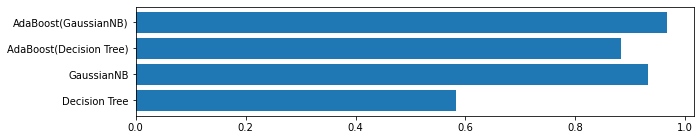

In [57]:
plt.figure(figsize=(10,2))
plt.barh(np.arange(4),[acc_dt,acc_gnb,acc_ada,acc_agnb],\
         tick_label=['Decision Tree','GaussianNB','AdaBoost(Decision Tree)','AdaBoost(GaussianNB)'])

**Result:** From the bar plot we can see a significant increase of accuracy by using AdaBoost algorithm.